Minimum loss: 94.8968505859375
Final loss: 94.8968505859375


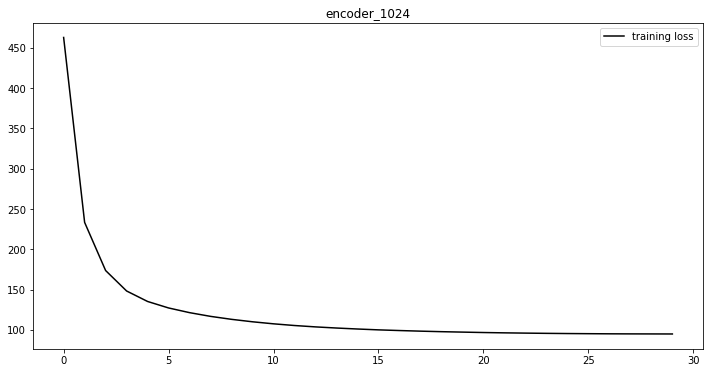

In [7]:
import matplotlib.pyplot as plt
import pickle
import os

# ENCODER_DIR = 'trained_models/encoders/encoder_tissue_224_1024_256_30_1e-05_baseline'
ENCODER_DIR = 'trained_models/encoders/dim/encoder_1024'

with open(os.path.join(ENCODER_DIR, 'history.pickle'), 'rb') as file:
    history = pickle.load(file)

print('Minimum loss:', min(history['loss']))
print('Final loss:', history['loss'][-1])

plt.figure(figsize=(12, 6))
plt.title(os.path.split(ENCODER_DIR)[-1])

plt.plot(history['loss'], label='training loss', c='k')
plt.legend()

# plt.gca().set_yscale('log')
plt.show()

In [6]:
!python evaluate_classifier.py -d "trained_models/classifiers/barlow_4096" -p 4096

Figure(1000x600)
At early stop epoch,
	loss: 3.65752
	acc: 0.84473
	top_2_accuracy: 0.96729
	MCC: 0.71587
	val_loss: 3.67464
	val_acc: 0.83757
	val_top_2_accuracy: 0.95996
	val_MCC: 0.70287

Calculating statistics...
Found 9910 validated image filenames belonging to 4 classes.
minor: ['junk' 'tils'] Found 1757 validated image filenames belonging to 4 classes.
major: ['stroma' 'tumor'] Found 8153 validated image filenames belonging to 4 classes.

all:
78/78 [==============================] - 32s 407ms/step - loss: 3.9031 - acc: 0.7163 - top_2_accuracy: 0.9011 - MCC: 0.5367
minor:
14/14 [==============================] - 6s 408ms/step - loss: 5.0059 - acc: 0.1918 - top_2_accuracy: 0.5612 - MCC: 0.1380
major:
64/64 [==============================] - 25s 383ms/step - loss: 3.6655 - acc: 0.8294 - top_2_accuracy: 0.9744 - MCC: 0.6529

generating confusion matrix...
100%|███████████████████████████████████████████████████████████████████████████████████| 78/78 [00:40<00:00,  1.93it/s]
Figure(

In [ ]:
!python train_classifier.py

Model name: barlow_0.01
Saving at: trained_models/classifiers/barlow_0.01
Found 424 validated image filenames belonging to 4 classes.
Found 6393 validated image filenames belonging to 4 classes.
Found 9910 validated image filenames belonging to 4 classes.
Number of devices: 3

Steps per epoch: 1
Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 3.6606 - acc: 0.2148 - top_2_accuracy: 0.4062 - MCC: -0.0066
Epoch 00001: val_acc improved from -inf to 0.31462, saving model to trained_models/classifiers/barlow_0.01/classifier.h5
1/1 [==============================] - 26s 26s/step - loss: 3.6606 - acc: 0.2148 - top_2_accuracy: 0.4062 - MCC: -0.0066 - val_loss: 47.8362 - val_acc: 0.3146 - val_top_2_accuracy: 0.3657 - val_MCC: 0.0028
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 3.6507 - acc: 0.2148 - top_2_accuracy: 0.4141 - MCC: -0.0371
Epoch 00002: val_acc did not improve from 0.31462
1/1 [==============================] - 23s 23s/step - loss: 3.6507 - acc

1/1 [==============================] - ETA: 0s - loss: 3.0055 - acc: 0.6680 - top_2_accuracy: 0.9062 - MCC: 0.3375
Epoch 00021: val_acc did not improve from 0.32243
1/1 [==============================] - 22s 22s/step - loss: 3.0055 - acc: 0.6680 - top_2_accuracy: 0.9062 - MCC: 0.3375 - val_loss: 6.5998 - val_acc: 0.3089 - val_top_2_accuracy: 0.5872 - val_MCC: 0.0290
Epoch 22/30
1/1 [==============================] - ETA: 0s - loss: 3.0372 - acc: 0.6523 - top_2_accuracy: 0.8633 - MCC: 0.3628
Epoch 00022: val_acc did not improve from 0.32243
1/1 [==============================] - 23s 23s/step - loss: 3.0372 - acc: 0.6523 - top_2_accuracy: 0.8633 - MCC: 0.3628 - val_loss: 6.3678 - val_acc: 0.3167 - val_top_2_accuracy: 0.5998 - val_MCC: 0.0191
Epoch 23/30
1/1 [==============================] - ETA: 0s - loss: 2.9755 - acc: 0.6758 - top_2_accuracy: 0.8828 - MCC: 0.3687
Epoch 00023: val_acc did not improve from 0.32243
1/1 [==============================] - 23s 23s/step - loss: 2.9755 - acc:

8/8 [==============================] - ETA: 0s - loss: 2.7143 - acc: 0.7983 - top_2_accuracy: 0.9453 - MCC: 0.6195
Epoch 00010: val_acc did not improve from 0.57585
8/8 [==============================] - 27s 3s/step - loss: 2.7143 - acc: 0.7983 - top_2_accuracy: 0.9453 - MCC: 0.6195 - val_loss: 3.7593 - val_acc: 0.3579 - val_top_2_accuracy: 0.6919 - val_MCC: 0.0814
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2.7504 - acc: 0.7803 - top_2_accuracy: 0.9360 - MCC: 0.5940
Epoch 00011: val_acc did not improve from 0.57585
8/8 [==============================] - 27s 3s/step - loss: 2.7504 - acc: 0.7803 - top_2_accuracy: 0.9360 - MCC: 0.5940 - val_loss: 3.6578 - val_acc: 0.3921 - val_top_2_accuracy: 0.7118 - val_MCC: 0.0898
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2.7087 - acc: 0.7993 - top_2_accuracy: 0.9429 - MCC: 0.6244
Epoch 00012: val_acc did not improve from 0.57585
8/8 [==============================] - 26s 3s/step - loss: 2.7087 - acc: 0.

8/8 [==============================] - ETA: 0s - loss: 2.6690 - acc: 0.8125 - top_2_accuracy: 0.9521 - MCC: 0.6552
Epoch 00029: val_acc improved from 0.75700 to 0.76270, saving model to trained_models/classifiers/barlow_0.05/classifier.h5
8/8 [==============================] - 25s 3s/step - loss: 2.6690 - acc: 0.8125 - top_2_accuracy: 0.9521 - MCC: 0.6552 - val_loss: 2.7908 - val_acc: 0.7627 - val_top_2_accuracy: 0.9287 - val_MCC: 0.5638
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2.6776 - acc: 0.8081 - top_2_accuracy: 0.9487 - MCC: 0.6500
Epoch 00030: val_acc improved from 0.76270 to 0.76969, saving model to trained_models/classifiers/barlow_0.05/classifier.h5
38/38 [==============================] - 27s 719ms/step - loss: 2.9882 - acc: 0.6884 - top_2_accuracy: 0.8659 - MCC: 0.5130
Model name: barlow_0.1
Saving at: trained_models/classifiers/barlow_0.1
Found 4260 validated image filenames belonging to 4 classes.
Found 6393 validated image filenames belonging to 